In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

## Seeds Dataset

In [2]:
# Load seeds from https://archive.ics.uci.edu/ml/datasets/seeds
columns = ['area', 'perimeter', 'compactness', 'length', 'width', 'coefficient', 'groove length', 'varieties']
seeds = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/00236/seeds_dataset.txt', 
                    header=None, delim_whitespace=True, names=columns)
seeds.head()

,area,perimeter,compactness,length,width,coefficient,groove length,varieties
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1


In [3]:
# DataFrame to NumPy Array
samples = seeds.iloc[:, :-1].values
varieties = seeds.iloc[:, -1].values
samples.shape, varieties.shape

((210, 7), (210,))

## Correlated data

In [4]:
# Extract width and length of seeds
correlated = seeds[['width','length']].values
correlated.shape

(210, 2)

In [5]:
# Assign the 0th column of correlated
width = correlated[:, 0]
# Assign the 1th column of correlated
length = correlated[:, 1]

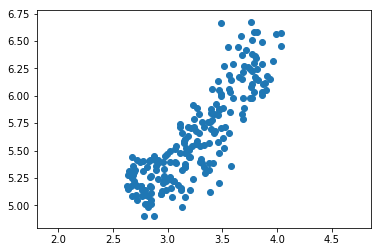

In [6]:
# Scatter plot width vs length
# plt.figure(figsize=(20,10))
plt.scatter(width, length)
plt.axis('equal')
plt.show()

In [7]:
# Calculate the Pearson correlation
correlation, pvalue = pearsonr(width, length)
correlation

0.86041493771434674

## Decorrelating with PCA

In [8]:
# Create PCA instance
model = PCA()

In [9]:
# Apply the fit_transform method of model to correlated
pca_features = model.fit_transform(correlated)

In [10]:
# Assign 0th column of pca_features
xs = pca_features[:,0]
# Assign 1st column of pca_features
ys = pca_features[:,1]

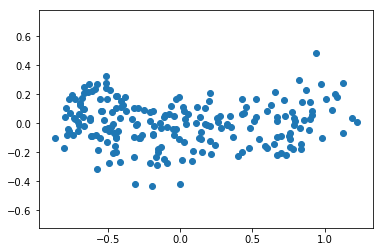

In [11]:
# Scatter plot xs vs ys
plt.scatter(xs, ys)
plt.axis('equal')
plt.show()

In [12]:
# Calculate the Pearson correlation of xs and ys
correlation, pvalue = pearsonr(xs, ys)
correlation

7.4746568994530421e-17

## The first principal component

In [13]:
# Create a PCA instance
model = PCA()

In [14]:
# Fit model to points
model.fit(correlated)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [15]:
# Get the mean of the seeds samples
mean = model.mean_

In [27]:
# Show all components
# Dimention: rows number = pca n_components, columns number = number of features in dataset
model.components_

array([[ 0.63910027,  0.76912343],
       [-0.76912343,  0.63910027]])

In [17]:
# Get the first principal component
first_pc = model.components_[0,:]

In [18]:
# Make a scatter plot of the untransformed points
plt.scatter(correlated[:,0], correlated[:,1])

In [19]:
# Plot first_pc as an arrow, starting at mean
plt.arrow(mean[0], mean[1], first_pc[0], first_pc[1], color='red', width=0.01)

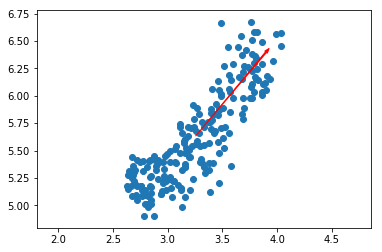

In [20]:
# Keep axes on same scale
plt.axis('equal')
plt.show()

## Variance of the PCA features

In [21]:
# Create scaler
scaler = StandardScaler()

In [22]:
# Create a PCA instance
pca = PCA()

In [23]:
# Create pipeline
pipeline = make_pipeline(scaler, pca)

In [24]:
# Fit the pipeline to 'samples'
pipeline.fit(samples)

Pipeline(steps=[('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('pca', PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False))])

In [25]:
pca.components_

array([[ 0.44447352,  0.44157147,  0.27701737,  0.42356333,  0.43281866,
        -0.11869248,  0.38716084],
       [-0.02656355, -0.08400282,  0.52915125, -0.20597518,  0.11668963,
        -0.71688203, -0.37719327],
       [ 0.02587094, -0.05983912,  0.62969178, -0.21187966,  0.21648338,
         0.67950584, -0.2138972 ],
       [ 0.19363997,  0.29545659, -0.3328164 ,  0.26340659,  0.19963039,
         0.09246481, -0.80414995],
       [ 0.20441167,  0.17427591, -0.33265481, -0.76609839,  0.46536555,
        -0.03625822,  0.11134657],
       [-0.42643686, -0.47623853, -0.14162884,  0.27357647,  0.70301171,
        -0.01964186,  0.04282974],
       [ 0.73480569, -0.67075153, -0.0725527 ,  0.04627605, -0.03928908,
        -0.00372346, -0.0344981 ]])

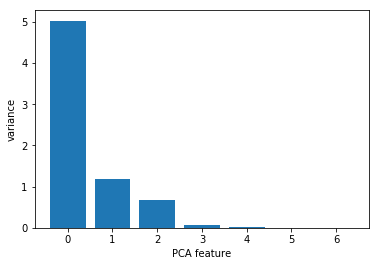

In [24]:
# Plot the explained variances
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_)
plt.xlabel('PCA feature')
plt.ylabel('variance')
plt.xticks(features)
plt.show()